# Julia for Dynamical Systems and Scientific Machine Learning

### Julia ecosystems of scientific computing

There are many Julia organizations about seemingly every scientific area. Some examples:

- Astrophysics: [JuliaAstro](https://juliaastro.github.io/), [JuliaSpace](https://github.com/JuliaSpace)
- Bio/Chemistry: [JuliaBio](https://biojulia.net/), [Molecular simulations](https://github.com/JuliaMolSim)
- Complex systems, nonlinear dynamics: [JuliaDynamics](https://juliadynamics.github.io/JuliaDynamics/)
- Scientific Machine Learning: [SciML](https://juliadiffeq.org/)
- Solid state: [QuantumOptics](https://qojulia.org/), [JuliaPhysics](https://github.com/JuliaPhysics)
- Economics: [QuantEcon](https://julia.quantecon.org/), [JuliaQuant](https://github.com/JuliaQuant)
- Geosciences/Climate: [JuliaGeo](https://github.com/JuliaGeo), [JuliaEarth](https://github.com/JuliaEarth), [JuliaClimate](https://github.com/JuliaClimate), [CliMA](https://github.com/CliMA)
- Optimization: [JuliaOpt](http://www.juliaopt.org/)
- Machine Learning: [JuliaML](https://juliaml.github.io/), [Flux](https://fluxml.ai/)

among many many others...

For discovering more packages you can take a look at this [curated list](https://github.com/svaksha/Julia.jl) (although some of the topics are a bit outdated), to the [JuliaHub](https://juliahub.com/) or checking out the [JuliaCon's playlists](https://www.youtube.com/user/JuliaLanguage/playlists).



In [ ]:
#Run this while we are working on Atom to save time

using Pkg
Pkg.activate(".")
Pkg.instantiate()
using DifferentialEquations, Plots, Interact, DynamicalSystems, StaticArrays, LinearAlgebra
using DataDrivenDiffEq, ModelingToolkit, DiffEqFlux, DiffEqSensitivity, Flux, Optim, Random

 Activating environment at `~/Julia-for-DS-and-SciML/Project.toml`
┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15828122449508496358\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4468895332082233332\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-15828122449508496358\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling DataDrivenDiffEq [2445eb08-9709-466a-b3fc-47e12bd697a2]
└ @ Base loading.jl:1260
┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1260


# 1. DifferentialEquations.jl

[DifferentialEquations.jl](https://docs.juliadiffeq.org/latest/) is by far [the best](https://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/) free and open source differential equations solver (not for Julia, for any language). It can solve standard ODEs, Delay-DEs, stochastic DEs, has tools for PDEs, event handling, other multiple features, 100s of solvers, and *even more*.


## Defining and solving some ODEs

The way DifferentialEquations.jl works is quite straightforward:

1. Make your set of ODEs a Julia function `f`
2. Put `f`, an initial state, timespan and a parameter container into an `ODEProblem`.
2. Optionaly choose the solvers and the arguments of the solvers you will use (e.g. tolerances, etc.)
3. Give `f` and auxilary arguments to the function `solve`!

Let's see it in practice by solving the Lorenz system

$$
\begin{aligned}
\dot{x} &= \sigma (y - x) \\
\dot{y} &= x (\rho - z) - y \\
\dot{z} &= xy -\beta z
\end{aligned}
$$

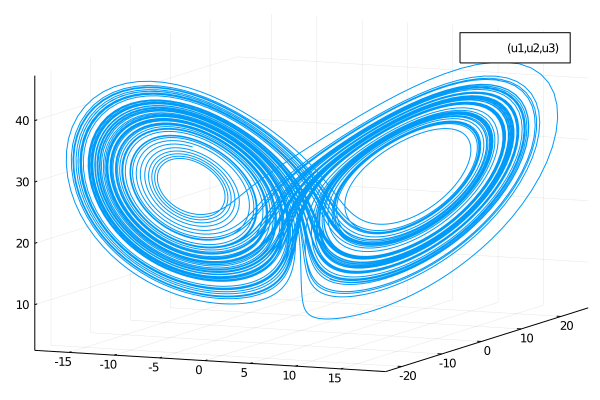

In [2]:
function lorenz(u,p,t)                        # define the system
    x, y, z = u
    σ, ρ, β = p
    
    ẋ = σ*(y - x)
    ẏ = x*(ρ - z) - y
    ż = x*y - β*z
    
    return [ẋ, ẏ, ż]
end
                                
u₀ = [1.0, 5.0, 10.0]                         # initial conditions
p = [10, 28, 8/3]                             # parameters        
tspan = (0.0, 100.0)                          # timespan
prob = ODEProblem(lorenz, u₀, tspan, p)       # define the problem
sol = solve(prob)                             # solve it
plot(sol, vars = (1, 2, 3))                   # plot the solution

Let's see some other plots

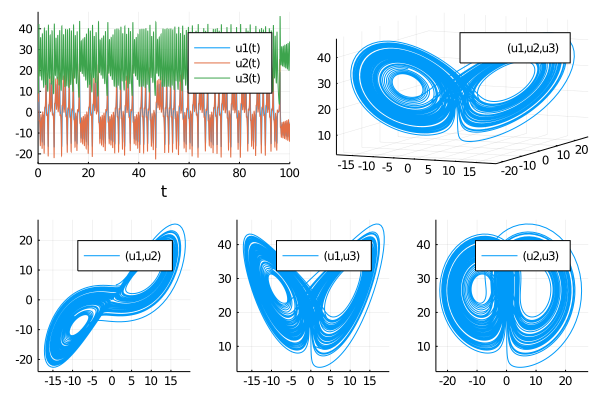

In [3]:
xyzt = plot(sol)
xy = plot(sol, vars=(1,2))
xz = plot(sol, vars=(1,3))
yz = plot(sol, vars=(2,3))
xyz = plot(sol, vars=(1,2,3))

plot(plot(xyzt,xyz), plot(xy, xz, yz, layout=(1,3)), layout=(2,1))

Another quick example, now providing the equations in-place:

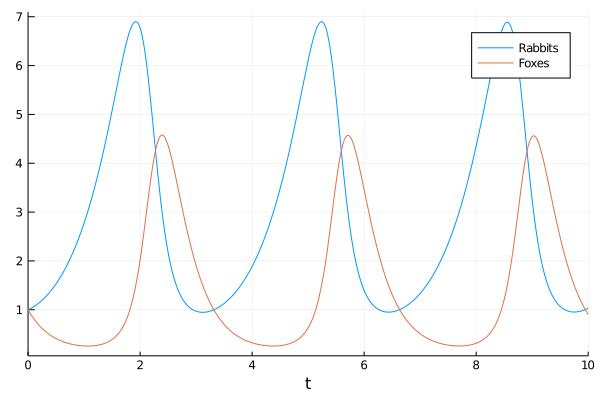

In [4]:
function lotka_volterra!(du,u,p,t)                        # define the system
    🐇, 🦊 = u
    α, β, γ, δ = p
    
    du[1] = d🐇 =  α*🐇 - β*🐇*🦊
    du[2] = d🦊 = -γ*🦊 + δ*🐇*🦊
end
                                        
ũ₀ = [1.0, 1.0]                                           # initial conditions
timespan = (0.0, 10.0)                                    # timespan
p̃ = [1.5, 1.0, 3.0, 1.0]                                  # parameters
prob = ODEProblem(lotka_volterra!, ũ₀, timespan, p̃)       # define the problem
sol_lv = solve(prob)                                      # solve it
plot(sol_lv, label = ["Rabbits" "Foxes"])                 # plot solution

In [5]:
@manipulate for α ∈ 0:0.1:5, β ∈ 0:0.1:5
    p̃ = [α β 3.0 1.0]
    prob = ODEProblem(lotka_volterra!, ũ₀, timespan, p̃)
    sol_lv = solve(prob)
    plot(sol_lv, label = ["Rabbits" "Foxes"])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 51,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/ger/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/ger/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/ger/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/ger/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/ger/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000145cfa650, Task (runnable) @0x0000000145cfa650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",\"2.8\",\"2.9\",\"3.0\",\"3.1\",\"3.

https://github.com/SciML/DiffEqTutorials.jl

# 2. DynamicalSystems.jl

DynamicalSystems.jl is an award-winning library for nonlinear dynamics and chaos, part of [JuliaDynamics](https://juliadynamics.github.io/JuliaDynamics/)

<img src="map_of_ds.png">

## Using known system $f$


If you have a dynamical system where you know its rule $f$, there are a lot of things you can do with in DynamicalSystems.jl. But for all of them, step 1 is to make this rule $f$ into a `DynamicalSystem` instance. The process here is almost identical to DifferentialEquations.jl:

1. Make $f$ a Julia function (using the same syntax as in DifferentialEquations.jl).
2. Choose initial state and parameter container (again same as DiffEq).
3. Pass these arguments to the `ContinuousDynamicalSystem` constructor (or `DiscreteDynamicalSystem`, for discrete systems).

Here we already have `lorenz, u₀, p` defined, so the process would be just:

In [6]:
lorenz_ds = ContinuousDynamicalSystem(lorenz, u₀, p)

ArgumentError: ArgumentError: Equations of motion must return an `SVector` or number for out-of-place form!

Actually, DynamicalSystems.jl requires that we use StaticArrays when we provide an out-of-place equation of motion, which are similar to usual arrays but are stack-allocated and thus are more performant for small systems ( $\lesssim$ 100 ODEs/SDEs/DDEs/DAEs).

In [7]:
function lorenz(u,p,t)
    x, y, z = u
    σ, ρ, β = p
    
    ẋ = σ*(y - x)
    ẏ = x*(ρ - z) - y
    ż = x*y - β*z
    
    return SVector(ẋ, ẏ, ż)
end
                                
static_u₀ = SVector(1.0, 5., 10.)

3-element SArray{Tuple{3},Float64,1,3} with indices SOneTo(3):
  1.0
  5.0
 10.0

In [8]:
lorenz_ds = ContinuousDynamicalSystem(lorenz, static_u₀, p)

3-dimensional continuous dynamical system
 state:       [1.0, 5.0, 10.0]
 e.o.m.:      lorenz
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [10.0, 28.0, 2.6666666666666665]

Now we can use this `lorenz` object in various functions of the library. For example, to obtain the Lyapunov spectrum you use `lyapunovs`:

In [9]:
lyapunovs(lorenz_ds, 10000) # 2nd argument is for how much time to evolve

3-element Array{Float64,1}:
   0.9056641798870981
  -0.00011965409912976072
 -14.572187921503037

Or if we want to get only the maximum Lyapunov exponent you can use the function `lyapunov` (which uses a different algorithm):

In [10]:
lyapunov(lorenz_ds, 10000.0)

0.9059559093358722

Obtaining a Poincare surface of section with the plane that e.g. the $y$ variable crosses zero:

In [11]:
plane = (2, 0.0) # plane[1]: which variable, plane[2]: which value
psos = poincaresos(lorenz_ds, plane, 1000.0)

3-dimensional Dataset{Float64} with 477 points
  -5.00534   -1.54492e-6   29.5196
  -9.10453   -3.82078e-9   36.3973
  -9.74329   -1.26771e-7   37.4704
   0.905462  -1.79218e-13  20.4352
  -8.09122   -1.81065e-7   34.7056
  -6.33575   -2.74628e-8   31.779
 -10.1609    -5.6165e-8    38.1757
   3.02588    1.73247e-6   25.8946
  -8.341     -1.57075e-7   35.1221
  -8.91658   -6.2628e-8    36.0827
  -8.85132   -1.12782e-7   35.9738
  -8.54134   -1.94607e-7   35.4562
  -6.8428    -6.75518e-7   32.6274
   ⋮                       
 -10.3922    -4.22627e-8   38.5678
 -10.3235    -5.08719e-8   38.4513
  -9.7269    -2.23709e-9   37.4428
   0.837539  -8.35633e-11  20.1642
  -7.47561   -4.31149e-8   33.681
 -13.4539     1.10527e-11  43.8883
   2.26476    1.07664e-8   24.2869
  -7.14613   -1.04572e-7   33.133
 -11.6361     1.66782e-9   40.6983
  -9.08893   -1.58606e-7   36.3714
  -9.66825   -8.97958e-8   37.344
   0.592255  -3.52867e-10  19.0331

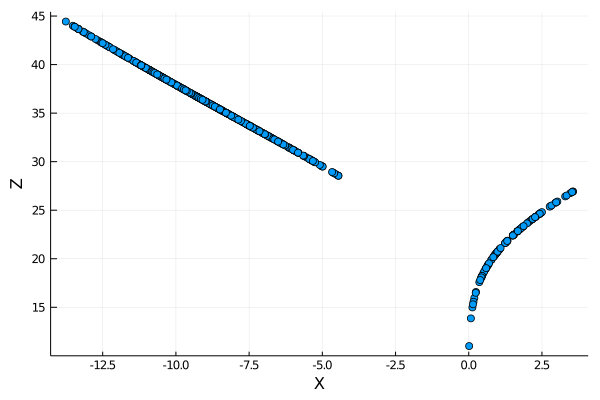

In [12]:
scatter(psos[:, 1], psos[:, 3], label = false)
xlabel!("X")
ylabel!("Z")

## Nonlinear timeseries analysis



Many nonlinear timeseries analysis tools are included in DynamicalSystems.jl. such as Broomhead-King delay embeddings, time series prediction, calculating the generalized (Rényi) and permutation entropy, many different kinds attractor dimensions (like fractal dimension, Grassberger-Proccacia dimension, Kaplan-Yorke dimension), etc. 

Let's say that you have a nice trajectory sampled at discrete times (which is what the function `trajectory` does).

In [13]:
tr = trajectory(lorenz_ds, 100.0; dt = 0.01)

3-dimensional Dataset{Float64} with 10001 points
  1.0       5.0      10.0
  1.38811   5.1658    9.79687
  1.75844   5.40109   9.62119
  2.11919   5.70356   9.47431
  2.47759   6.07194   9.35858
  2.84011   6.50582   9.27734
  3.21259   7.0055    9.23497
  3.60039   7.57172   9.23696
  4.00844   8.20551   9.29002
  4.44127   8.90786   9.40225
  4.90309   9.67941   9.58328
  5.39774  10.52      9.84438
  5.9286   11.4282   10.1986
  ⋮                  
  9.75521  15.5946   19.2006
 10.3439   16.266    20.2762
 10.9369   16.8585   21.4832
 11.5249   17.345    22.815
 12.097    17.6972   24.2589
 12.6405   17.8871   25.7948
 13.1414   17.8891   27.3945
 13.585    17.6827   29.0224
 13.956    17.2549   30.636
 14.2401   16.6027   32.1886
 14.4246   15.7349   33.6318
 14.4994   14.6723   34.9197

Let's see an example of calculating the [generalized entropy](https://juliadynamics.github.io/DynamicalSystems.jl/dev/chaos/entropies/#Generalized-Entropy-1) of the attractor (which is calculated by partitioning the state space in boxes of size `ε`).

You can get this entropy (of order α) using the function `genentropy(α, ε, tr)`:

In [14]:
H = genentropy(1, 0.1, tr)

9.181331096319909

In [15]:
H = genentropy(1, 0.01, tr)

9.210440366976329

This quantity is interesting because it can be used to calculate the fractal dimension of the `tr` object. The way it works is simple: You look at how `H` changes for varying `ε`. If `D` is the fractal dimension of `tr`, then it typically holds that $H \sim ε^{-D}$.

In [16]:
D_lorenz = generalized_dim(1, tr)

┌ Warning: Boxsizes limits do not differ by 2 orders of magnitude or more. Setting `w -= 0.5; z += 0.5`. Please adjust keywords or provide a bigger dataset.
└ @ ChaosTools /Users/ger/.julia/packages/ChaosTools/NUuFb/src/dimensions/dims.jl:157


1.9025414515304109

# 3. DataDrivenDiffEq.jl

[DataDrivenDiffEq.jl](https://datadriven.sciml.ai/dev/) is a package for estimating equation-free and equation-based models for discrete and continuous differential equations.

As opposed to parameter identification, these methods aim to find the governing equations of motion automatically from a given set of data. They do not require a known model as input. Instead, these methods take in data and return the differential equation model which generated the data.

## Sparse Identification of Nonlinear Dynamics (SINDy)

<img src="SINDy.png">

(extracted from the original [SINDy paper](https://www.pnas.org/content/113/15/3932))

Create an array from the Dynamicalsystems.jl dataset:

In [17]:
# X = [tr[:,1]'
#      tr[:,2]'
#      tr[:,3]']
X = Array(sol)

3×1368 Array{Float64,2}:
  1.0  2.31565  3.2378   4.99387   7.42118  …  -11.9492  -10.722    -9.52963
  5.0  5.89756  7.04103  9.83294  13.9493      -13.0554   -7.25097  -5.43178
 10.0  9.40679  9.23368  9.62611  11.5823       30.2069   33.4649   32.7101

We generate the *ideal* derivative data.

In [18]:
Ẋ = similar(X)
for (i, xi) in enumerate(eachcol(X))
    Ẋ[:,i] = lorenz(xi, p, 0.0)
end

To generate the symbolic equations, we need to define a ` Basis` over the variables `x y z`. In this example, we will use all monomials up to degree of 4 and their products:

In [19]:
@variables x y z
u = Operation[x; y; z]
polys = Operation[]
for i ∈ 0:4
    for j ∈ 0:4
        for  k ∈ 0:4
            push!(polys, u[1]^i * u[2]^j * u[3]^k)
        end
    end
end
basis = Basis(polys, u)
print(basis)

┌ Warning: `simplify_constants(ex)` is deprecated, use `simplify(ex)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:631 [inlined]
└ @ Core ./broadcast.jl:631
┌ Warning: `simplify_constants(ex)` is deprecated, use `simplify(ex)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:631 [inlined]
└ @ Core ./broadcast.jl:631
┌ Warning: `simplify_constants(ex)` is deprecated, use `simplify(ex)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:631 [inlined]
└ @ Core ./broadcast.jl:631


125 dimensional basis in ["x", "y", "z"]
f_1 = ModelingToolkit.Constant(1)
f_2 = z
f_3 = z ^ 2
f_4 = z ^ 3
f_5 = z ^ 4
f_6 = y
f_7 = y * z
f_8 = z ^ 2 * y
f_9 = z ^ 3 * y
f_10 = z ^ 4 * y
f_11 = y ^ 2
f_12 = y ^ 2 * z
f_13 = y ^ 2 * z ^ 2
f_14 = y ^ 2 * z ^ 3
f_15 = y ^ 2 * z ^ 4
f_16 = y ^ 3
f_17 = y ^ 3 * z
f_18 = z ^ 2 * y ^ 3
f_19 = y ^ 3 * z ^ 3
f_20 = y ^ 3 * z ^ 4
f_21 = y ^ 4
f_22 = y ^ 4 * z
f_23 = z ^ 2 * y ^ 4
f_24 = z ^ 3 * y ^ 4
f_25 = y ^ 4 * z ^ 4
f_26 = x
f_27 = x * z
f_28 = z ^ 2 * x
f_29 = z ^ 3 * x
f_30 = z ^ 4 * x
f_31 = x * y
f_32 = x * y * z
f_33 = z ^ 2 * x * y
f_34 = z ^ 3 * x * y
f_35 = z ^ 4 * x * y
f_36 = y ^ 2 * x
f_37 = y ^ 2 * x * z
f_38 = y ^ 2 * z ^ 2 * x
f_39 = y ^ 2 * z ^ 3 * x
f_40 = y ^ 2 * z ^ 4 * x
f_41 = y ^ 3 * x
f_42 = y ^ 3 * x * z
f_43 = z ^ 2 * y ^ 3 * x
f_44 = y ^ 3 * z ^ 3 * x
f_45 = y ^ 3 * z ^ 4 * x
f_46 = y ^ 4 * x
f_47 = y ^ 4 * x * z
f_48 = z ^ 2 * y ^ 4 * x
f_49 = z ^ 3 * y ^ 4 * x
f_50 = y ^ 4 * z ^ 4 * x
f_51 = x ^ 2
f_52 = x ^ 2 * 

But we could also add more functions to the basis:

In [20]:
h = [cos(u[1]); sin(u[1]); u[1]*sin(u[2]); u[2]*cos(u[2])]

push!(basis, h)
print(basis)

129 dimensional basis in ["x", "y", "z"]
f_1 = ModelingToolkit.Constant(1)
f_2 = z
f_3 = z ^ 2
f_4 = z ^ 3
f_5 = z ^ 4
f_6 = y
f_7 = y * z
f_8 = z ^ 2 * y
f_9 = z ^ 3 * y
f_10 = z ^ 4 * y
f_11 = y ^ 2
f_12 = y ^ 2 * z
f_13 = y ^ 2 * z ^ 2
f_14 = y ^ 2 * z ^ 3
f_15 = y ^ 2 * z ^ 4
f_16 = y ^ 3
f_17 = y ^ 3 * z
f_18 = z ^ 2 * y ^ 3
f_19 = y ^ 3 * z ^ 3
f_20 = y ^ 3 * z ^ 4
f_21 = y ^ 4
f_22 = y ^ 4 * z
f_23 = z ^ 2 * y ^ 4
f_24 = z ^ 3 * y ^ 4
f_25 = y ^ 4 * z ^ 4
f_26 = x
f_27 = x * z
f_28 = z ^ 2 * x
f_29 = z ^ 3 * x
f_30 = z ^ 4 * x
f_31 = x * y
f_32 = x * y * z
f_33 = z ^ 2 * x * y
f_34 = z ^ 3 * x * y
f_35 = z ^ 4 * x * y
f_36 = y ^ 2 * x
f_37 = y ^ 2 * x * z
f_38 = y ^ 2 * z ^ 2 * x
f_39 = y ^ 2 * z ^ 3 * x
f_40 = y ^ 2 * z ^ 4 * x
f_41 = y ^ 3 * x
f_42 = y ^ 3 * x * z
f_43 = z ^ 2 * y ^ 3 * x
f_44 = y ^ 3 * z ^ 3 * x
f_45 = y ^ 3 * z ^ 4 * x
f_46 = y ^ 4 * x
f_47 = y ^ 4 * x * z
f_48 = z ^ 2 * y ^ 4 * x
f_49 = z ^ 3 * y ^ 4 * x
f_50 = y ^ 4 * z ^ 4 * x
f_51 = x ^ 2
f_52 = x ^ 2 * 

Now we can select an optimizier, and run the SINDy algorithm

In [21]:
opt = STRRidge(0.1)
Ψ = SInDy(X, Ẋ, basis, maxiter = 100, opt = opt, normalize = true)

┌ Warning: `simplify_constants(ex)` is deprecated, use `simplify(ex)` instead.
│   caller = push!(::Basis{Array{Any,1},Array{Operation,1},Array{Operation,1},Operation}, ::Operation) at basis.jl:127
└ @ DataDrivenDiffEq /Users/ger/.julia/packages/DataDrivenDiffEq/3pCDm/src/basis.jl:127


Sparse Identification Result with 7 active terms.

In [22]:
print_equations(Ψ)

3 dimensional basis in ["x", "y", "z"]
dx = p₁ * y + p₂ * x
dy = p₃ * y + p₄ * x + p₅ * x * z
dz = p₆ * z + p₇ * x * y


In [23]:
ps = parameters(Ψ)

7-element Array{Float64,1}:
  10.000000000000009
 -10.0
  -1.0000000000000473
  28.000000000000007
  -0.9999999999999994
  -2.6666666666666643
   0.9999999999999997

Let's have a look at the ``L2``-Error and Akaikes Information Criterion of the result

In [24]:
get_error(Ψ)

3-element Array{Float64,1}:
 2.8679371147661178e-12
 1.0774977884913733e-11
 1.6854300513865304e-12

In [25]:
get_aicc(Ψ)

3-element Array{Float64,1}:
 110.32730778768861
 107.04452515815353
 112.45359675317138

To generate a numerical model usable in `DifferentialEquations`, we simply use the `ODESystem` function from `ModelingToolkit`.

In [26]:
ps = parameters(Ψ)
sys = ODESystem(Ψ)
dudt = ODEFunction(sys)

prob = ODEProblem(dudt, u₀, tspan, ps)
solution = solve(prob, saveat = sol.t)

retcode: Success
Interpolation: 1st order linear
t: 1368-element Array{Float64,1}:
   0.0
   0.0354861341350177
   0.060663987304508726
   0.10188870843348657
   0.1448498679508511
   0.19835698662820245
   0.2504996228815297
   0.3056774805827286
   0.35452829390108126
   0.40770996764610945
   0.45396975760765645
   0.5146359501891049
   0.5750607253053894
   ⋮
  98.95688785145474
  99.0683797701474
  99.17051925699538
  99.27656519547591
  99.3638862974475
  99.46136911917866
  99.55618579753207
  99.67050442020467
  99.766654599613
  99.87656028889765
  99.96895802959216
 100.0
u: 1368-element Array{Array{Float64,1},1}:
 [1.0, 5.0, 10.0]
 [2.315652235826173, 5.897559436807743, 9.406792559102836]
 [3.237795350433644, 7.041031570475956, 9.233678311348147]
 [4.993868184294174, 9.832941470623615, 9.626109614367381]
 [7.421184550586346, 13.949270734328747, 11.582332131961122]
 [11.459763300544065, 19.75311392425314, 18.104295519177157]
 [15.476108075765035, 21.5108706767548, 29.88726710

Let's have a look at the trajectory of $x(t)$.

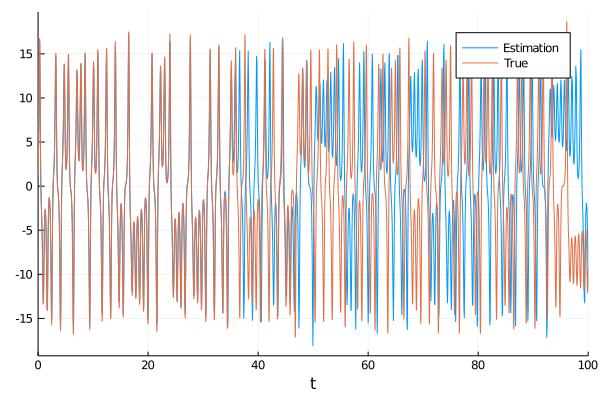

In [27]:
plot(solution, vars=1, label = "Estimation")
plot!(sol, vars = 1, label = "True")

Finally, let's investigate the error of the chaotic equations:

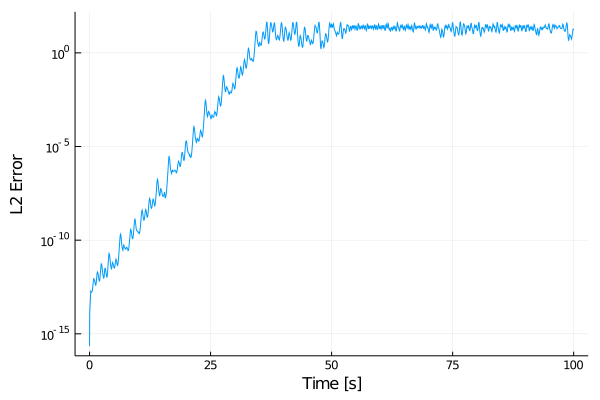

In [28]:
ϵ = norm.(eachcol(solution .- sol))
plot(solution.t, ϵ .+ eps(), yaxis = :log, legend = false)
xlabel!("Time [s]")
ylabel!("L2 Error")

# 4. DiffEqFlux.jl

[DiffEqFlux.jl](https://diffeqflux.sciml.ai/) is another really exciting package from the [Scientific Machine Learning Ecosystem](https://sciml.ai). Besides implementing NeuralODEs/SDEs/DDEs, etc they provide tools for builing what they have called [Universal Differential Equations](https://arxiv.org/abs/2001.04385).

What if we only know some part of the differential equations?
Could we plug some neural networks to infer the missing terms?

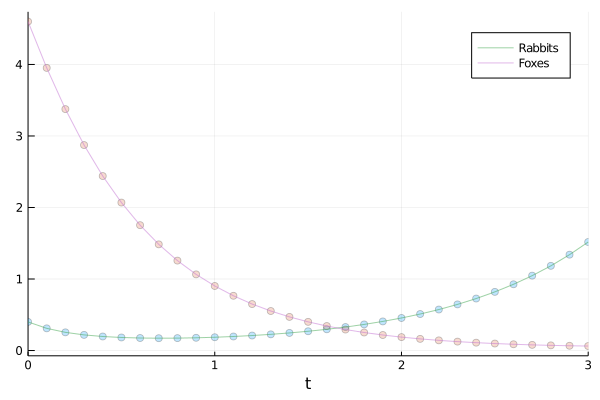

In [29]:
function lotka_volterra(u, p,t)
    🐇, 🦊 = u
    α, β, γ, δ = p

    d🐇 =  α*🐇 - β*🐇*🦊
    d🦊 = -γ*🦊 + δ*🐇*🦊
    return [d🐇, d🦊]
end

tspan = (0.0, 3.0)
u₀ = [0.4, 4.6]
p₀ = [1.3, 0.9, 1.8, 0.8]
prob = ODEProblem(lotka_volterra, u₀, tspan, p₀)
solution = solve(prob, Vern7(), abstol=1e-12, reltol=1e-12, saveat = 0.1)

scatter(solution, alpha = 0.25, label = false)
plot!(solution, alpha = 0.5, label = ["Rabbits" "Foxes"])

Create some noisy data from the true solution

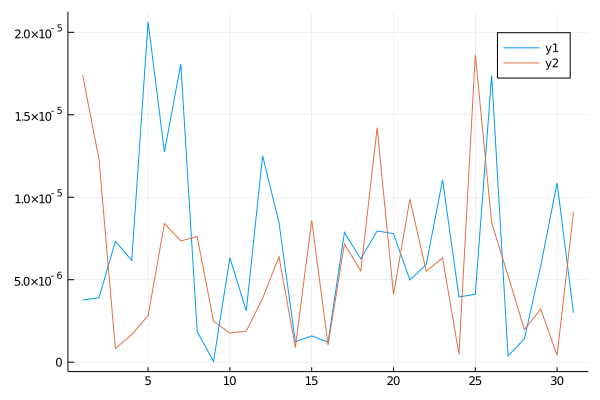

In [30]:
# Ideal data
tsdata = Array(solution)
# Add noise to the data
# Random.seed!(112358)
Random.seed!(333)
noisy_data = tsdata + 1e-5*randn(eltype(tsdata), size(tsdata))

plot(abs.(tsdata - noisy_data)')

Let's suppose that we actually don't know the underlying equations but we know or can guess some parts of it. We could use an artificial neural network to learn the missing terms:

$$
\begin{aligned}
\dot{x} &= \alpha x + NN_1(x, y) \\
\dot{y} &= - \gamma y + NN_2(x, y)\\
\end{aligned}
$$

In [31]:
function lotka_volterra_univ(u,p,t)
    🐇, 🦊 = u
    α = p₀[1]
    γ = p₀[3]
    NN₁, NN₂ = ann(u, p)

    d🐇 =  α*🐇 + NN₁
    d🦊 = -γ*🦊 + NN₂

    return [d🐇, d🦊]
end

lotka_volterra_univ (generic function with 1 method)

┌ Warning: `concrete_solve(prob::DiffEqBase.DEProblem, alg::Union{DiffEqBase.DEAlgorithm, Nothing}, u0 = prob.u0, p = prob.p, args...; kwargs...)` is deprecated, use `solve(prob, alg, args...; u0 = u0, p = p, kwargs...)` instead.
│   caller = ip:0x0
└ @ Core :-1


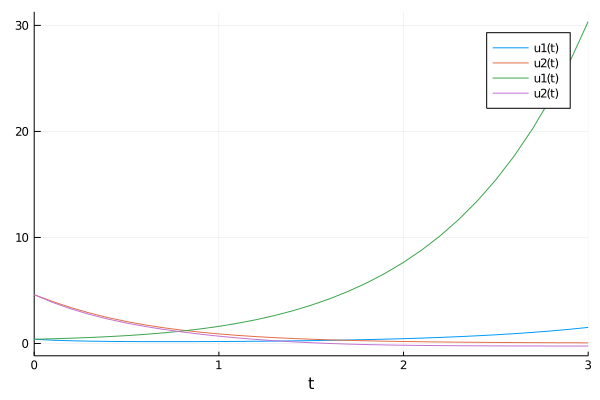

In [32]:
# Define a neueral network for learning the parts
# of the equations that we don't know
ann = FastChain(FastDense(2, 32, tanh),
                FastDense(32, 32, tanh),
                FastDense(32, 2))

# The model weights are destructured into a vector of parameters
p = initial_params(ann)

prob_univ = ODEProblem(lotka_volterra_univ, u₀, tspan, p)
sol_univ = concrete_solve(prob_univ, Tsit5(), u₀, p, saveat = solution.t)

# plot the true solution and 
plot(solution)
plot!(sol_univ)

Define the prediction function and loss:

In [33]:
function predict(θ)
    Array(concrete_solve(prob_univ, Vern7(), u₀, θ, saveat = solution.t,
                         abstol=1e-6, reltol=1e-6,
                         sensealg = InterpolatingAdjoint(autojacvec=ReverseDiffVJP())))
end

# No regularisation right now
function loss(θ)
    pred = predict(θ)
    sum(abs2, noisy_data .- pred), pred # + 1e-5*sum(sum.(abs, params(θ)))
end

loss(p)

(3460.264171272904, [0.4 0.4447933071556863 … 26.55636327952242 30.36250068498157; 4.6 3.8700501892644787 … -0.2409570639922274 -0.24312472196048013])

A callback for printing the loss:

In [34]:
const losses = []
callback2(θ,l,pred) = begin
    push!(losses, l)
    if length(losses)%50==0
        println(losses[end])
    end
    false
end

callback2 (generic function with 1 method)

We are ready to train it. First let's use ADAM for some iterations and then refine it with BFGS.

In [35]:
@time res1 = DiffEqFlux.sciml_train(loss, p, ADAM(0.01), cb=callback2, maxiters = 100)

loss: 9.54:  50%|████████████████████▌                    |  ETA: 0:01:00

9.544262555686585


loss: 6.84: 100%|█████████████████████████████████████████| Time: 0:01:06


6.8409792034377706
 69.175449 seconds (203.45 M allocations: 16.462 GiB, 7.47% gc time)


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [-2.31e-01, 5.27e-02, -3.39e-01,  ...]
    Minimum:   6.840979e+00

 * Found with
    Algorithm:     ADAM
    Initial Point: [-1.26e-01, 1.44e-01, -2.36e-01,  ...]

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 0.0e+00

 * Work counters
    Seconds run:   68  (vs limit Inf)
    Iterations:    100
    f(x) calls:    100
    ∇f(x) calls:   100


In [36]:
@time res2 = DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=0.01), cb=callback2, maxiters = 10000)

0.0234151306885414
0.0034065730037304695
0.001209107934790959
0.0009509132492514141
0.0006392673848559183
0.00035786032692014736
0.0002859553616657655
0.00023403797792349203
0.00014580934934333597
0.00010824968646840683
5.438096820214514e-5
2.427899584378501e-5
 80.393951 seconds (550.36 M allocations: 70.627 GiB, 18.70% gc time)


 * Status: failure (objective increased between iterations)

 * Candidate solution
    Minimizer: [-2.61e-01, -6.57e-02, -1.84e-01,  ...]
    Minimum:   1.561413e-05

 * Found with
    Algorithm:     BFGS
    Initial Point: [-2.31e-01, 5.27e-02, -3.39e-01,  ...]

 * Convergence measures
    |x - x'|               = 5.66e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.88e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.46e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.32e-07 ≰ 0.0e+00
    |g(x)|                 = 1.97e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   78  (vs limit Inf)
    Iterations:    632
    f(x) calls:    1733
    ∇f(x) calls:   1733


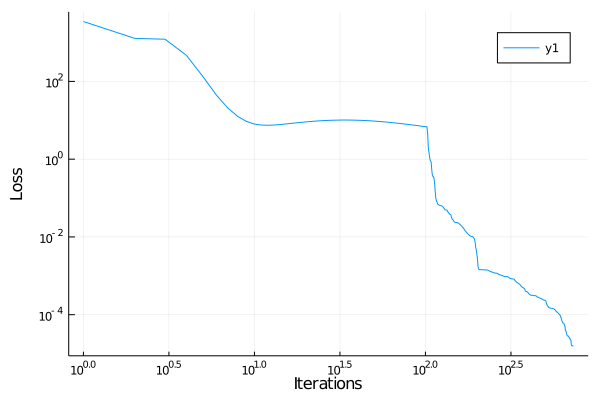

In [37]:
# Plot the losses
plot(losses, yaxis = :log, xaxis = :log, xlabel = "Iterations", ylabel = "Loss")

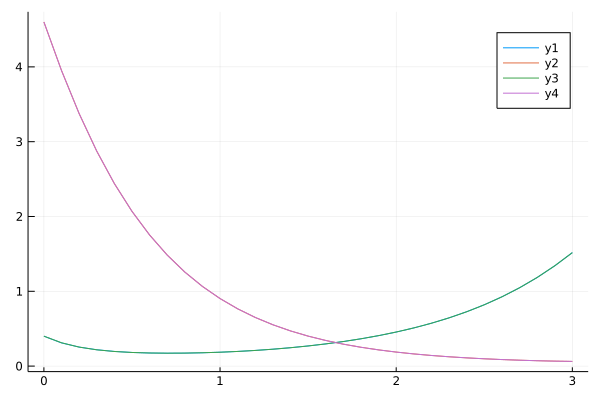

In [38]:
# Plot the data and the approximation
NNsolution = predict(res2.minimizer)
# Trained on noisy data vs real solution
plot(solution.t, tsdata')
plot!(solution.t, NNsolution')

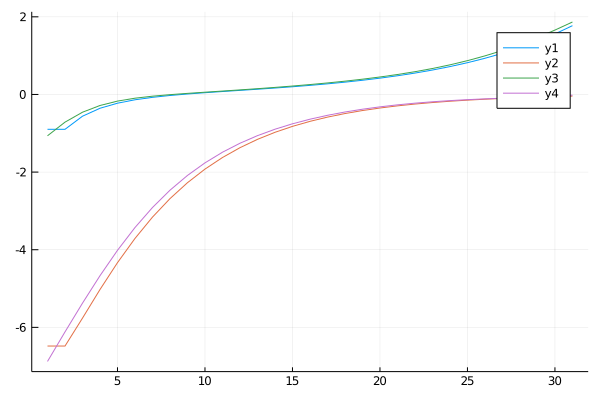

In [39]:
# Collect the state trajectory and the derivatives
X = noisy_data
# Ideal derivatives
DX = Array(solution(solution.t, Val{1})) #- [p[1]*(X[1,:])';  -p[4]*(X[2,:])']

prob_univ2 = ODEProblem(lotka_volterra_univ, u₀, tspan, res2.minimizer)
_sol = solve(prob_univ2, Tsit5())

DX_ = Array(_sol(solution.t, Val{1}))

# The learned derivatives
plot(DX')
plot!(DX_')

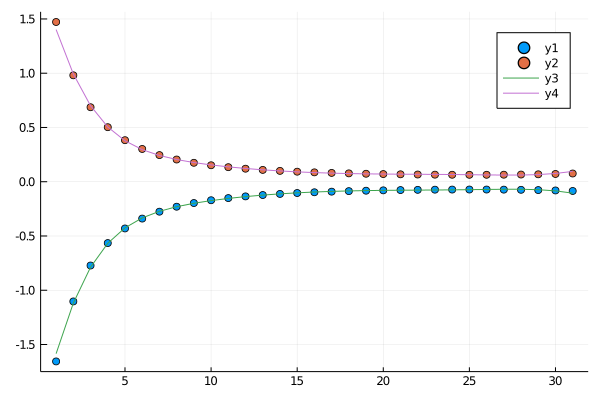

In [40]:
# True missing terms
L = [-p₀[2]*(X[1,:].*X[2,:])'; p₀[4]*(X[1,:].*X[2,:])']

# Learned
L̂ = ann(X,res2.minimizer)

scatter(L')
plot!(L̂')

# scatter(abs.(L-L̂)', yaxis = :log)

Now we can extend the time span of the integration and see how it performs for long term predictions

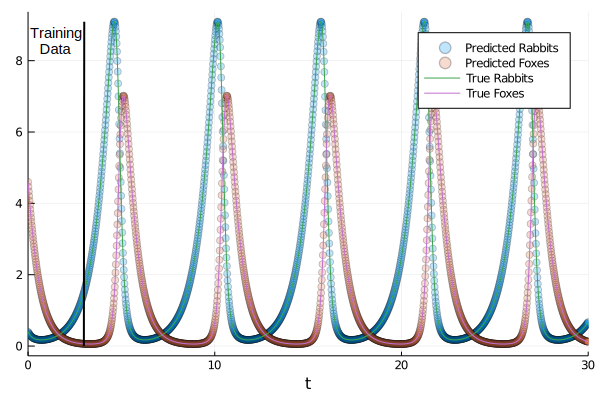

In [41]:
# Let's see some long term predictions
tspan_long = (0.0f0, 30.0f0)
prob = ODEProblem(lotka_volterra, u₀, tspan_long, p₀)
solution = solve(prob, Vern7(), abstol=1e-6, reltol=1e-6)

prob_univ = ODEProblem(lotka_volterra_univ, u₀, tspan_long, res2.minimizer)
sol_univ = solve(prob, Vern7(), abstol=1e-6, reltol=1e-6)



scatter(sol_univ, alpha = 0.25, label = ["Predicted Rabbits" "Predicted Foxes"])
plot!(solution, label = ["True Rabbits" "True Foxes"])
plot!([2.99,3.01],[0.0, maximum(hcat(Array(solution), Array(sol_univ)))],
      lw=2, color=:black, label = false)
annotate!([(1.5,9, text("Training \nData", 10, :center, :top, :black, "Helvetica"))])